# OpenPipe State-of-the-Art Model

This notebook explores what it will take to train a state-of-the-art, or pareto-optimal, model for competitive or niche tasks.

Fundamentally, there is a tradeoff between a benchmark's popularity/prestige and the ease of achieving state-of-the-art results:

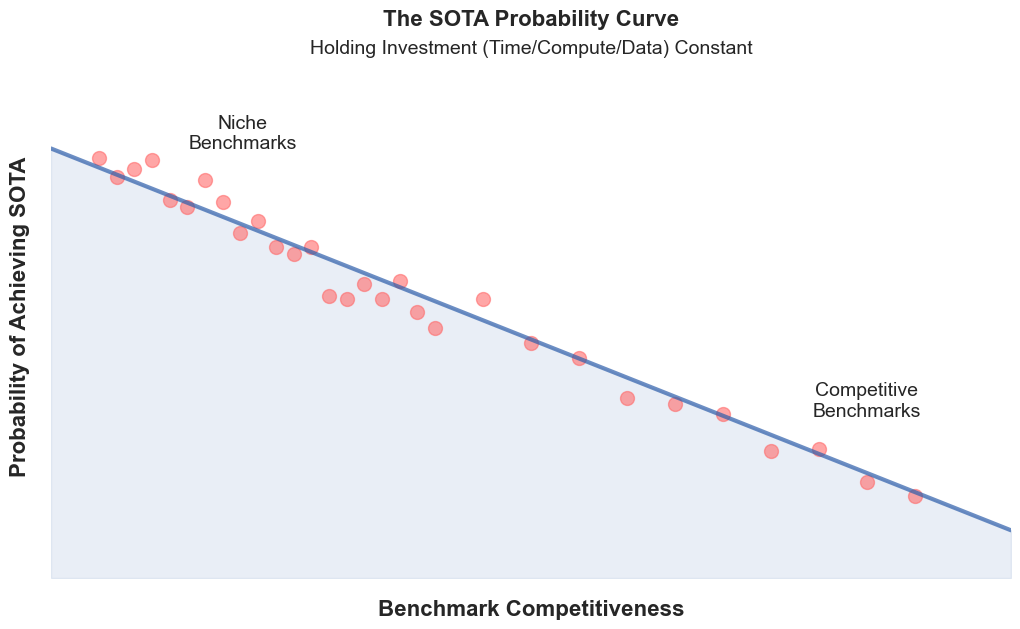

In [85]:
# Tradeoff

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for a clean, modern look
plt.style.use('seaborn-v0_8-whitegrid')

# Create smooth data points for a linear relationship
x = np.linspace(0, 100, 100)
y = -0.004 * x + 0.45  # Linear function with negative slope

# Create the plot with a specific figure size ratio
plt.figure(figsize=(12, 7))

# Plot the main curve with a gradient
plt.plot(x, y, color='#2E5EAA', linewidth=3, alpha=0.7)

# Add a subtle fill below the curve
plt.fill_between(x, y, alpha=0.1, color='#2E5EAA')

# Add scatter points with more density on the left side
np.random.seed(42)
# Create more points on the left side (niche benchmarks)
left_x = np.linspace(5, 40, 20)
left_y = -0.004 * left_x + 0.45 + np.random.normal(0, 0.02, 20)

# Fewer points on the right side (popular benchmarks)
right_x = np.linspace(45, 90, 10)
right_y = -0.004 * right_x + 0.45 + np.random.normal(0, 0.015, 10)

# Combine and plot all points
plt.scatter(np.concatenate([left_x, right_x]), 
           np.concatenate([left_y, right_y]), 
           c='#FF6B6B', s=100, alpha=0.6)

# Customize the plot with larger, bolder labels
plt.xlabel('Benchmark Competitiveness', fontsize=16, fontfamily='sans-serif', fontweight='bold', labelpad=15)
plt.ylabel('Probability of Achieving SOTA', fontsize=16, fontfamily='sans-serif', fontweight='bold', labelpad=15)

# Add title and subtitle with proper spacing
plt.title('The SOTA Probability Curve', fontsize=16, fontfamily='sans-serif', fontweight='bold', pad=20)
plt.text(0.5, 1.0, 'Holding Investment (Time/Compute/Data) Constant', 
         fontsize=14, fontfamily='sans-serif', ha='center', transform=plt.gca().transAxes)

# Remove all ticks
plt.gca().set_xticks([])
plt.gca().set_yticks([])

# Clean up the axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Adjust the axis limits for better visual balance
plt.xlim(0, 100)
plt.ylim(0, 0.55)

# Add subtle grid
plt.grid(False)

# Add annotations with larger font size
plt.annotate('Niche\nBenchmarks', xy=(20, 0.45), xytext=(20, 0.45),  # moved right from 15 to 25
            ha='center', fontsize=14, fontfamily='sans-serif')
plt.annotate('Competitive\nBenchmarks', xy=(85, 0.17), xytext=(85, 0.17),  # moved up from 0.05/0.1 to 0.15/0.2
            ha='center', fontsize=14, fontfamily='sans-serif')

# Adjust the margins to add more padding
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.9)

plt.show()

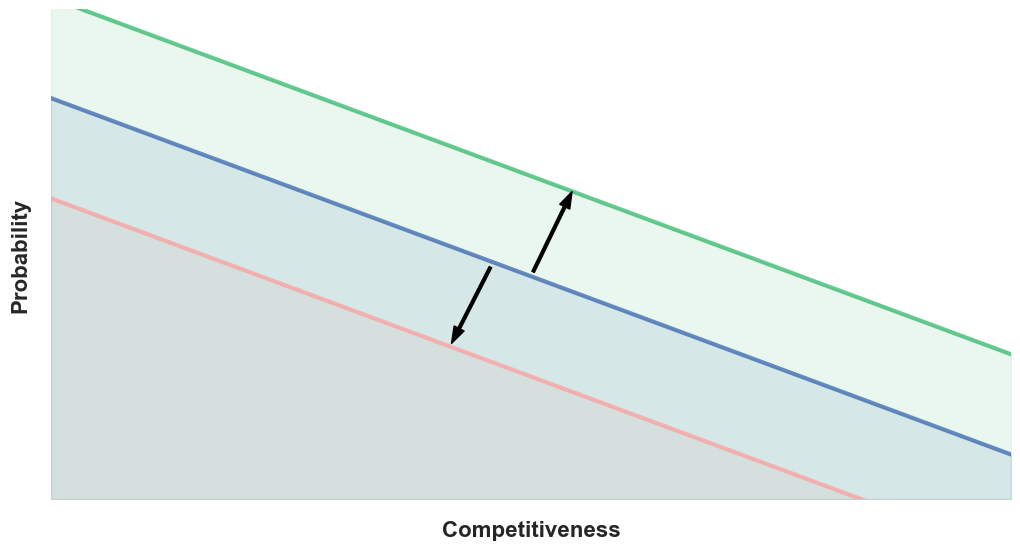

In [ ]:
# Shift the curve

# Create smooth data points for multiple linear relationships
x = np.linspace(0, 100, 100)
base_slope = -0.004

# Create the plot with a specific figure size ratio
plt.figure(figsize=(12, 7))

# Plot three curves for different investment levels
investment_levels = [0.75, 1.0, 1.25]  # relative investment multipliers
colors = ['#FF9B9B', '#2E5EAA', '#28B463']  # red, blue, green
labels = ['Low Investment', 'Base Investment', 'High Investment']

for inv, color, label in zip(investment_levels, colors, labels):
    # Shift the y-intercept based on investment level
    y = base_slope * x + (0.45 * inv)
    
    # Plot the main curve
    plt.plot(x, y, color=color, linewidth=3, alpha=0.7, label=label)
    
    # Add subtle fill below each curve
    plt.fill_between(x, y, alpha=0.1, color=color)

# Add arrows to show movement
# Both arrows now start from a central point on the middle (blue) line
plt.annotate('', xy=(54.5, 0.35), xytext=(50, 0.25),  # top arrow
            arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=8))
plt.annotate('', xy=(41.5, 0.17), xytext=(46, 0.265),  # bottom arrow
            arrowprops=dict(facecolor='black', shrink=0.05, width=2, headwidth=8))

# Customize the plot
plt.xlabel('Competitiveness', fontsize=16, fontfamily='sans-serif', fontweight='bold', labelpad=15)
plt.ylabel('Probability', fontsize=16, fontfamily='sans-serif', fontweight='bold', labelpad=15)

# # Add title and subtitle
# plt.title('The SOTA Probability Curve: Investment Effects', fontsize=16, fontfamily='sans-serif', fontweight='bold', pad=20)
# plt.text(0.5, 1.05, 'Higher Investment Shifts the Curve Outward', 
#          fontsize=14, fontfamily='sans-serif', ha='center', transform=plt.gca().transAxes)

# Remove ticks and clean up axes
plt.gca().set_xticks([])
plt.gca().set_yticks([])
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# # Add legend
# plt.legend(loc='upper right', fontsize=12)

# Adjust limits and margins
plt.xlim(0, 100)
plt.ylim(0, 0.55)
plt.grid(False)
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.85)

plt.show()